In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
df = pd.read_csv("third(400).csv")

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539,NaN
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754,NaN
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857,NaN
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886,NaN
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945,Insomnia


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Person ID                              400 non-null    int64  
 1   Gender                                 400 non-null    object 
 2   Age                                    400 non-null    int64  
 3   Occupation                             400 non-null    object 
 4   Sleep Duration (hours)                 400 non-null    float64
 5   Quality of Sleep (scale: 1-10)         400 non-null    float64
 6   Physical Activity Level (minutes/day)  400 non-null    int64  
 7   Stress Level (scale: 1-10)             400 non-null    int64  
 8   BMI Category                           400 non-null    object 
 9   Blood Pressure (systolic/diastolic)    400 non-null    object 
 10  Heart Rate (bpm)                       400 non-null    int64  
 11  Daily 

In [5]:
df.isnull().sum()

Person ID                                  0
Gender                                     0
Age                                        0
Occupation                                 0
Sleep Duration (hours)                     0
Quality of Sleep (scale: 1-10)             0
Physical Activity Level (minutes/day)      0
Stress Level (scale: 1-10)                 0
BMI Category                               0
Blood Pressure (systolic/diastolic)        0
Heart Rate (bpm)                           0
Daily Steps                                0
Sleep Disorder                           290
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.rename(columns={
    'Sleep Duration (hours)': 'Sleep Duration',
    'Quality of Sleep (scale: 1-10)': 'Quality of Sleep',
    'Physical Activity Level (minutes/day)': 'Physical Activity Level',
    'Stress Level (scale: 1-10)': 'Stress Level',
    'Blood Pressure (systolic/diastolic)': 'Blood Pressure',
    'Heart Rate (bpm)': 'Heart Rate',
}, inplace=True)


In [8]:
# Person ID -> irrelevant column
# Sleep Disorder -> alot of missing data

df.drop(columns=["Person ID", "Sleep Disorder"], inplace=True)

In [9]:
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])

In [10]:
# i will apply it in the merge with all the files

# encoder = OneHotEncoder(sparse_output=False)
# occupation_encoded = encoder.fit_transform(df[["Occupation"]])
# occupation_df = pd.DataFrame(occupation_encoded, columns=encoder.get_feature_names_out(["Occupation"]))

# df.drop(columns=["Occupation"], inplace=True)
# df = pd.concat([df.reset_index(drop=True), occupation_df], axis=1)

In [11]:
df["BMI Category"].value_counts()

BMI Category
Overweight     109
Underweight    102
Obese           98
Normal          91
Name: count, dtype: int64

In [12]:
bmi_mapping = {
    "Underweight": 0,
    "Normal": 1,
    "Overweight": 2,
    "Obese": 3
}

df["BMI Category"] = df["BMI Category"].map(bmi_mapping)

In [13]:
# Convert "Blood Pressure Ratio" from string ("126/82") to numeric (1.51)

df['Blood Pressure'] = df['Blood Pressure'].apply(lambda df: eval(df) if isinstance(df, str) else df)

In [14]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,29,Manual Labor,7.4,7.0,41,7,3,1.771429,91,8539
1,0,43,Retired,4.2,4.9,41,5,3,1.523256,81,18754
2,1,44,Retired,6.1,6.0,107,4,0,1.742857,81,2857
3,1,29,Office Worker,8.3,10.0,20,10,3,1.722222,55,6886
4,1,67,Retired,9.1,9.5,19,4,2,1.705128,97,14945


array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep Duration'}>],
       [<Axes: title={'center': 'Quality of Sleep'}>,
        <Axes: title={'center': 'Physical Activity Level'}>,
        <Axes: title={'center': 'Stress Level'}>],
       [<Axes: title={'center': 'BMI Category'}>,
        <Axes: title={'center': 'Blood Pressure'}>,
        <Axes: title={'center': 'Heart Rate'}>],
       [<Axes: title={'center': 'Daily Steps'}>, <Axes: >, <Axes: >]],
      dtype=object)

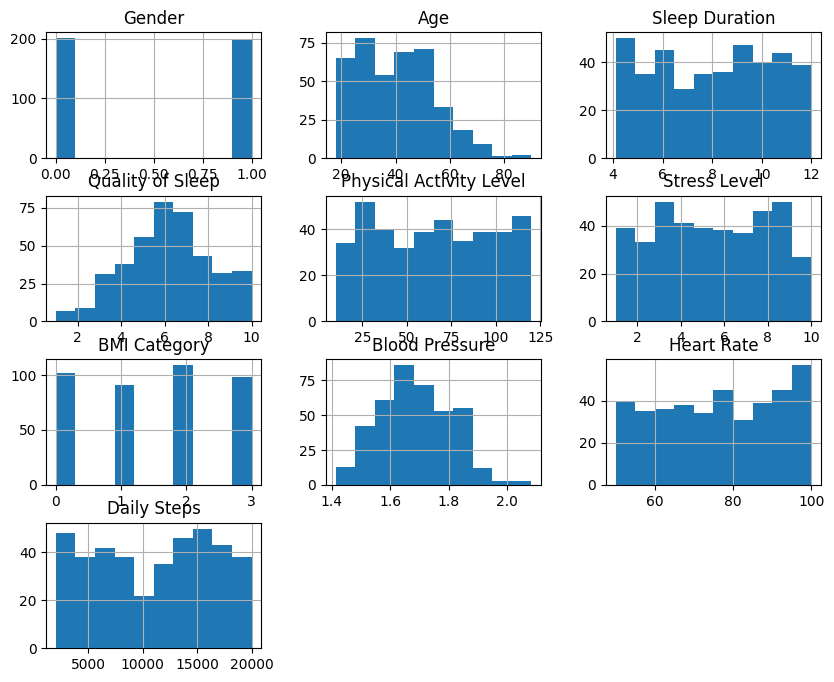

In [15]:
df.hist(figsize=(10, 8))

In [16]:
# we do not have outliers
# =======================

numerical_columns = df.select_dtypes(include=['number']).columns

# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outlier_info = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count number of outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

        outlier_info[col] = {
            "Q1": Q1, "Q3": Q3, "IQR": IQR,
            "Lower Bound": lower_bound, "Upper Bound": upper_bound,
            "Num Outliers": len(outliers),
            "Outliers": outliers.values  # Show outlier values
        }

    return outlier_info

# Detect outliers in all numerical columns
outliers = detect_outliers_iqr(df, numerical_columns)

for col, info in outliers.items():
    print(f"\nOutlier Analysis for: {col}")
    print(f"Q1: {info['Q1']}, Q3: {info['Q3']}, IQR: {info['IQR']}")
    print(f"Lower Bound: {info['Lower Bound']}, Upper Bound: {info['Upper Bound']}")
    print(f"Number of Outliers: {info['Num Outliers']}")
    print(f"Outliers: {info['Outliers']}\n")


Outlier Analysis for: Gender
Q1: 0.0, Q3: 1.0, IQR: 1.0
Lower Bound: -1.5, Upper Bound: 2.5
Number of Outliers: 0
Outliers: []


Outlier Analysis for: Age
Q1: 29.0, Q3: 49.0, IQR: 20.0
Lower Bound: -1.0, Upper Bound: 79.0
Number of Outliers: 3
Outliers: [80 90 86]


Outlier Analysis for: Sleep Duration
Q1: 5.9, Q3: 10.125, IQR: 4.225
Lower Bound: -0.4374999999999991, Upper Bound: 16.4625
Number of Outliers: 0
Outliers: []


Outlier Analysis for: Quality of Sleep
Q1: 4.7, Q3: 7.425000000000001, IQR: 2.7250000000000005
Lower Bound: 0.6124999999999998, Upper Bound: 11.512500000000001
Number of Outliers: 0
Outliers: []


Outlier Analysis for: Physical Activity Level
Q1: 35.0, Q3: 94.0, IQR: 59.0
Lower Bound: -53.5, Upper Bound: 182.5
Number of Outliers: 0
Outliers: []


Outlier Analysis for: Stress Level
Q1: 3.0, Q3: 8.0, IQR: 5.0
Lower Bound: -4.5, Upper Bound: 15.5
Number of Outliers: 0
Outliers: []


Outlier Analysis for: BMI Category
Q1: 0.0, Q3: 2.0, IQR: 2.0
Lower Bound: -3.0, Upper

In [17]:
df.to_csv('third_clean.csv', index=False)